In [811]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [812]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAs.csv")
dataframe = pd.read_csv(r"salida/TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAsmaxM.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi,CLASS
0,0.336712,0.303363,0.000000,0.102473,0.000000,0.000000,0.000000,0.0,0.0,0,0,1,0.272841,6.524279,13.284535,2.697227,entailment
1,0.609988,0.472324,0.000000,0.424633,0.869893,0.000000,0.000000,0.0,0.0,5,0,2,0.159916,2.310604,23.873234,4.924438,entailment
2,0.404836,0.409299,0.000000,0.406516,0.440236,0.000000,0.000000,0.0,0.0,2,0,0,0.256307,5.360355,11.503313,2.209444,contradiction
3,0.418081,0.000000,0.000000,0.385873,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,1.000000,2.845385,9.888334,1.457576,contradiction
4,0.646680,0.000000,0.000000,0.000000,0.000000,0.000000,0.323928,0.0,0.0,2,0,0,0.465413,3.080132,7.184703,2.859084,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.425643,0.412827,0.455184,0.362079,0.504415,0.000000,0.000000,0.0,0.0,0,0,1,0.110635,4.883518,19.256735,3.609311,entailment
96,1.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.0,0.0,2,0,1,0.652412,4.656574,6.084509,2.664728,entailment
97,0.355083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.467361,6.902841,3.825182,1.006833,contradiction
98,0.658487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.479299,4.725261,3.457137,1.828981,contradiction


In [813]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_ADV,ADV_NOUN,ADV_ADJ,ADV_ADV,sinonimos,antonimos,is_a,action_sim_nlp,distancia_euc,suma_info,suma_max_simi
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.630107,0.141560,0.071047,0.243601,0.194753,0.043640,0.037574,0.030109,0.014561,2.21000,0.160000,0.280000,0.540611,3.783845,12.757370,3.004463
std,0.218295,0.200539,0.164055,0.224937,0.332652,0.134252,0.117618,0.110975,0.102441,2.63732,0.394917,0.514045,0.317691,2.073540,10.018077,1.395959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.022551,0.000000,2.296483,1.006833
25%,0.459413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.283722,2.157127,6.502260,2.000000
50%,0.609014,0.000000,0.000000,0.314125,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,0.479299,3.835158,9.554792,2.700766
75%,0.760330,0.349467,0.000000,0.423288,0.414501,0.000000,0.000000,0.000000,0.000000,3.25000,0.000000,0.250000,0.869796,5.102988,15.874422,3.592703
max,1.000000,0.594927,0.692382,0.768382,1.000000,0.568032,0.521636,0.470733,0.732554,16.00000,2.000000,2.000000,1.000000,8.772804,57.355515,7.681334


In [814]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


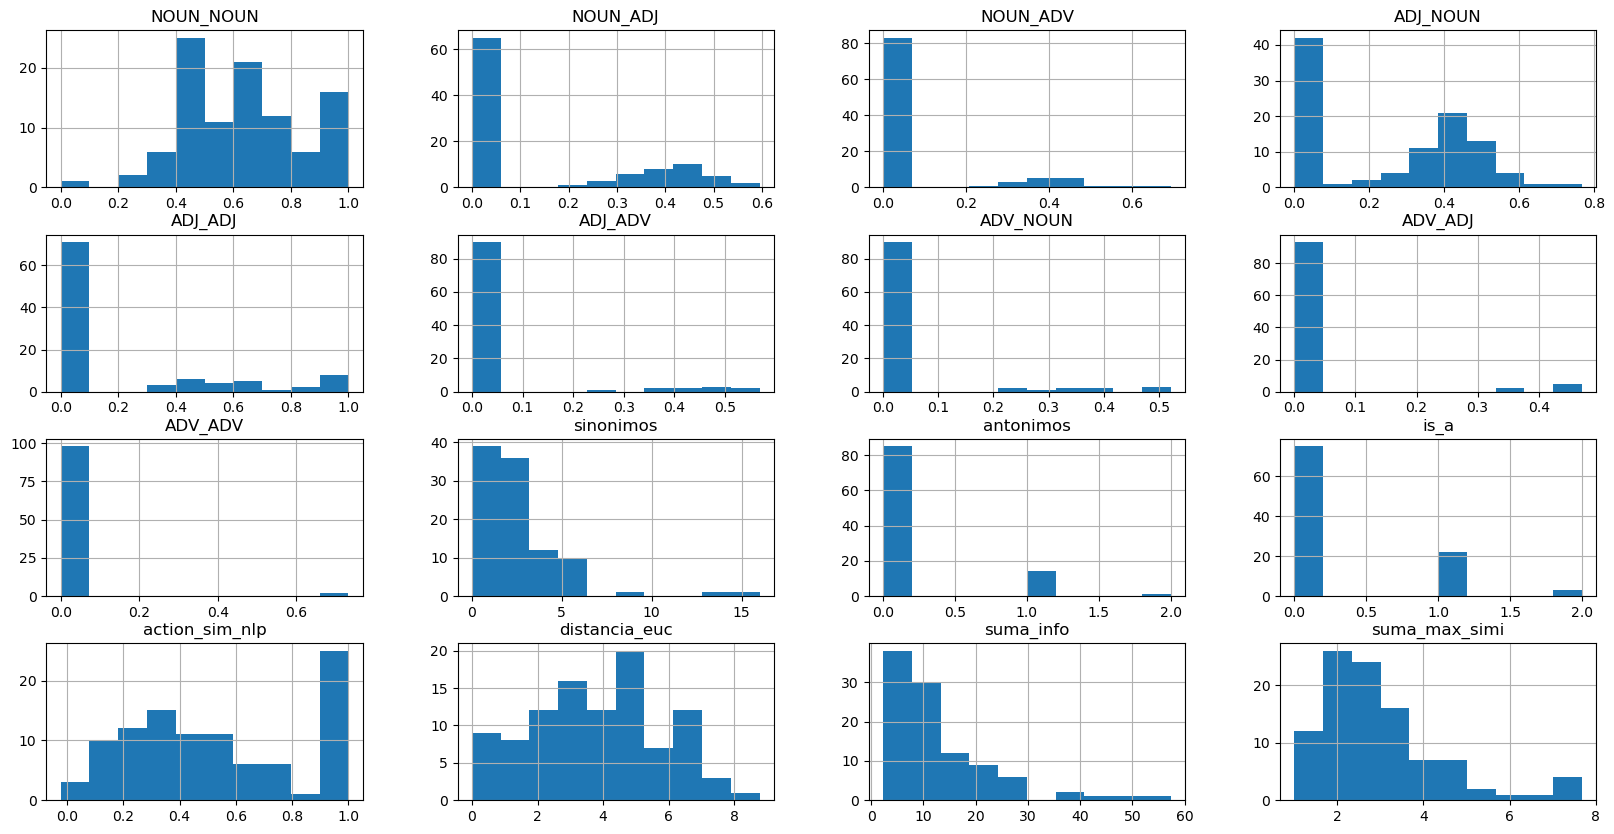

In [815]:
dataframe.hist(figsize=(20,10))
plt.show()

In [816]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

(100, 16)

In [817]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [818]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [819]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1,max_iter = 1000)
model.fit(X,y)

LogisticRegression(C=0.1, max_iter=1000)

In [820]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [821]:
model.decision_function(X)

array([[ 0.41459151, -0.74934508,  0.33475357],
       [-1.34793397,  0.86798926,  0.47994471],
       [ 0.05713827, -0.3000826 ,  0.24294433],
       [-0.36237229,  0.58992806, -0.22755577],
       [-0.34027089,  0.43328459, -0.09301371],
       [ 0.75892711, -1.04821553,  0.28928842],
       [-0.59146569,  0.6726249 , -0.08115921],
       [-0.91676048,  0.69669798,  0.2200625 ],
       [ 0.33195844, -0.50600758,  0.17404913],
       [-2.50970734,  2.4304902 ,  0.07921714],
       [-1.07890338,  1.0183598 ,  0.06054358],
       [ 0.94115822, -1.36592128,  0.42476305],
       [-0.16598226,  0.47261214, -0.30662988],
       [ 0.2294736 , -0.26141551,  0.03194191],
       [-0.79533482, -0.26587184,  1.06120666],
       [-0.47848503,  0.63383068, -0.15534565],
       [-0.9578223 ,  1.25355106, -0.29572876],
       [ 0.35863342, -0.34737129, -0.01126213],
       [-0.11129771,  0.23412217, -0.12282446],
       [-1.40537999,  1.54590705, -0.14052706],
       [-1.03999629,  1.31235903, -0.272

In [822]:
labels=dataframe.columns[1:]

In [823]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [824]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [825]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  10 is_a 11 action_sim_nlp
Entailment  12 distancia_euc 13 suma_info
Neutral  4 ADJ_ADV 10 is_a


In [826]:
n_columns=dataframe.shape[1]-1

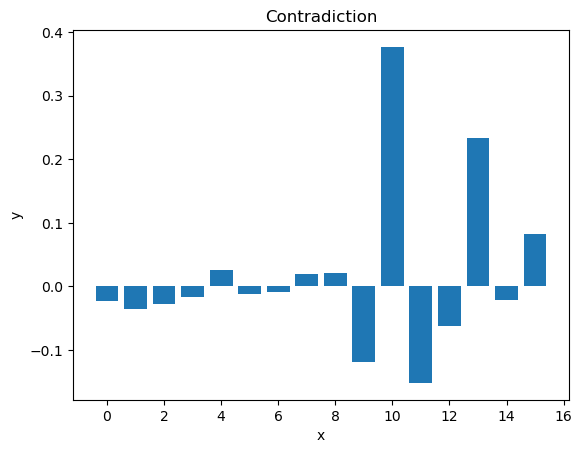

In [827]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

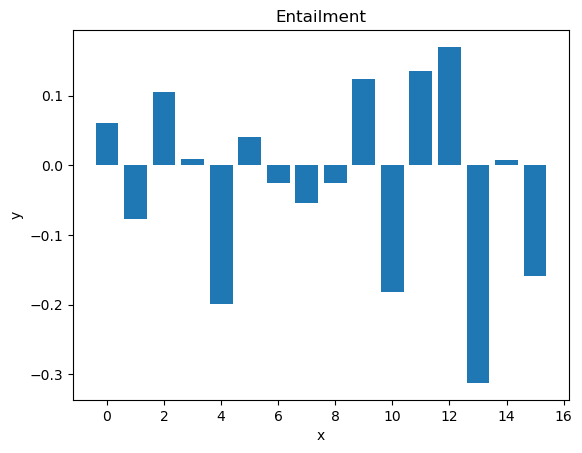

In [828]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

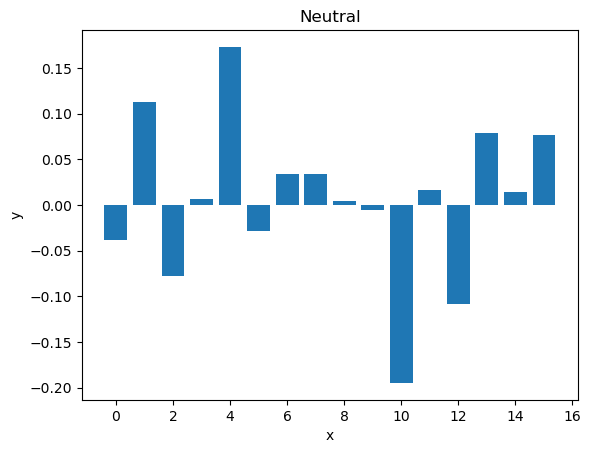

In [829]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [830]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'contradiction' 'entailment'
 'entailment' 'contradiction' 'entailment' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'entailment' 'contradiction' 'contradiction' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'neutral' 'contradiction' 'neutral' 'contradiction' 'contradiction'
 'neutral' 'entailment' 'contradiction' 'entailment' 'neutral'
 'entailment' 'neutral' 'entailment' 'contradiction' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'contradiction' 'entailment' 'contradiction' 'entailment'
 'entailment' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'contradiction' 'contradiction' 'entailment'
 'contradiction' 'neutral' 'contradicti

In [831]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [832]:
X

array([[ 0.33671199,  0.30336349,  0.        , ...,  6.5242792 ,
        13.28453541,  2.69722652],
       [ 0.60998798,  0.47232415,  0.        , ...,  2.31060406,
        23.8732338 ,  4.924438  ],
       [ 0.40483618,  0.40929902,  0.        , ...,  5.3603549 ,
        11.50331306,  2.20944357],
       ...,
       [ 0.35508341,  0.        ,  0.        , ...,  6.90284061,
         3.82518172,  1.00683296],
       [ 0.6584865 ,  0.        ,  0.        , ...,  4.72526089,
         3.45713663,  1.82898128],
       [ 0.33920481,  0.        ,  0.3749985 , ...,  4.79935058,
         8.60276222,  1.55305207]])

In [833]:
model.score(X,y)

0.59

In [834]:
print(confusion_matrix(y, predictions))

[[16  8  3]
 [ 5 33  4]
 [ 8 13 10]]


In [835]:
print(f1_score(y,predictions, average=None))

[0.57142857 0.6875     0.41666667]


In [836]:
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [837]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.537500 (0.198037)


In [838]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.65


In [839]:
print(confusion_matrix(Y_validation, predictions))

[[3 1 0]
 [1 5 0]
 [2 3 5]]


In [840]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.50      0.75      0.60         4
   entailment       0.56      0.83      0.67         6
      neutral       1.00      0.50      0.67        10

     accuracy                           0.65        20
    macro avg       0.69      0.69      0.64        20
 weighted avg       0.77      0.65      0.65        20



In [841]:
#X_new = pd.DataFrame()
#model.predict(X_new)